In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
movies_df = pd.read_csv('Data/movie_metadata.csv')

In [6]:
movies_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [7]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [8]:
# text_col=movies_df.select_dtypes(include=['object']).columns
# for i, col in enumerate(text_col) :
#     print('nombre de catégories de '+col+ ' :')
#     print(len(movies_df[col].unique()))
#     print('catégories : ')
#     print(movies_df[col].unique())
#     print('-------------')

## Wordcloud des mots-clés

In [21]:
from wordcloud import WordCloud
from collections import Counter

In [25]:
text = " ".join(keywords for keywords in movies_df.plot_keywords.astype(str))
text = text.replace('nan', '')

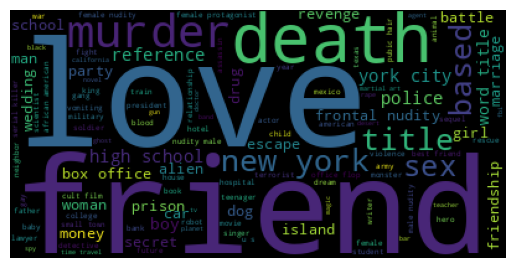

In [26]:
wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Colonne genre

In [10]:
#colonnes dummies pour le genre
movies_df_genres = movies_df['genres'].str.get_dummies(sep='|')

In [11]:
genre_counts = movies_df_genres.sum()

# Display the genre counts in descending order
genre_counts = genre_counts.sort_values(ascending=False)

# Display the result
print(genre_counts)

Drama          2594
Comedy         1872
Thriller       1411
Action         1153
Romance        1107
Adventure       923
Crime           889
Sci-Fi          616
Fantasy         610
Horror          565
Family          546
Mystery         500
Biography       293
Animation       242
Music           214
War             213
History         207
Sport           182
Musical         132
Documentary     121
Western          97
Film-Noir         6
Short             5
News              3
Reality-TV        2
Game-Show         1
dtype: int64


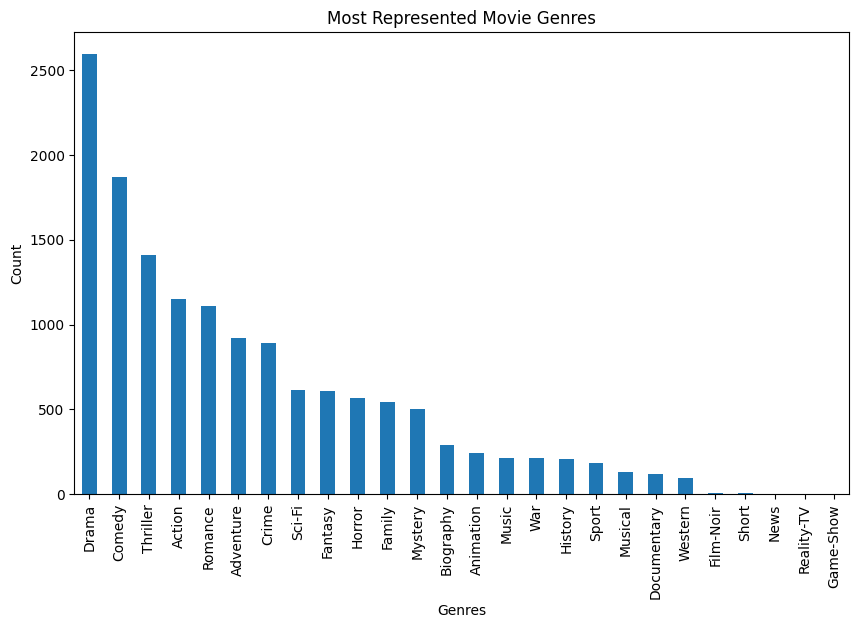

In [12]:
# Plot the genre counts
genre_counts.plot(kind='bar', figsize=(10, 6))
plt.title("Most Represented Movie Genres")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.show()

In [13]:
#On supprime les colonnes sous représentées : 
movies_df_genres = movies_df_genres.loc[:, genre_counts >= 5]

In [14]:
len(movies_df_genres.columns)

23

In [97]:
#On merge les colonnes avec le df, et on supprime la colonne "genres"
movies_df = pd.merge(movies_df, movies_df_genres, left_index=True, right_index=True)
movies_df.drop('genres', axis=1, inplace=True)

## colonne keywords

In [15]:
#colonnes dummies pour les keywords
movies_df_keywords = movies_df['plot_keywords'].str.get_dummies(sep='|')

In [16]:
keywords_counts = movies_df_keywords.sum()

# Display the genre counts in descending order
keywords_counts = keywords_counts.sort_values(ascending=False)

# Display the result
print(keywords_counts)

love                       198
friend                     166
murder                     161
death                      132
police                     126
                          ... 
high society                 1
high school sweethearts      1
high school romance          1
high school prom             1
lightning bolt               1
Length: 8086, dtype: int64


On sait qu'on peut retirer tous les keywords associés uniquement à un film, car on ne pourra pas s'en servir pour faire un association.

Pour éviter de surcharger le dataframe, on décide de retirer tous les keywords qui ne sont pas associés à au moins 5 films

In [17]:
#On supprime les colonnes sous représentées : 
movies_df_keywords = movies_df_keywords.loc[:, keywords_counts >= 5]

In [18]:
keywords_counts = movies_df_keywords.sum()

# Display the genre counts in descending order
keywords_counts = keywords_counts.sort_values(ascending=False)

# Display the result
print(keywords_counts)

love            198
friend          166
murder          161
death           132
police          126
               ... 
real estate       5
driver            5
duel              5
dwarf             5
17th century      5
Length: 1024, dtype: int64


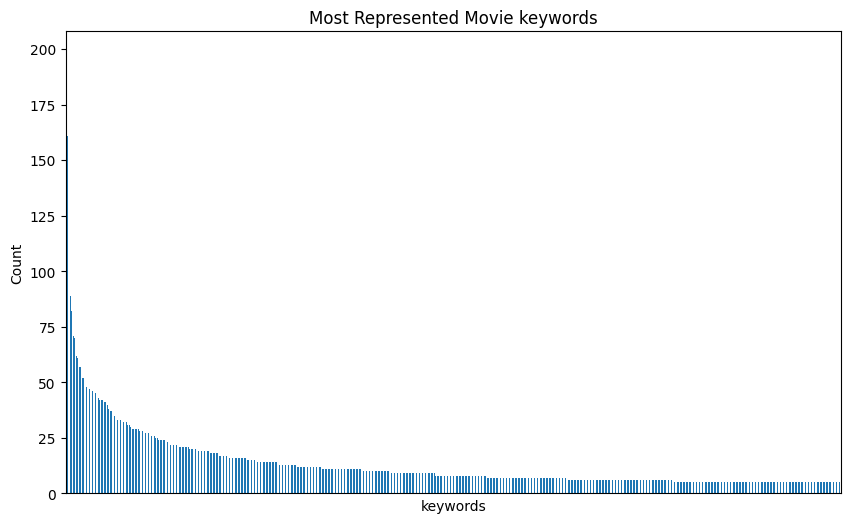

In [29]:
# Plot the keywords_counts
keywords_counts.plot(kind='bar', figsize=(10, 6), use_index=False)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title("Most Represented Movie keywords")
plt.xlabel("keywords")
plt.ylabel("Count")
plt.show()

In [111]:
movies_df = pd.merge(movies_df, movies_df_keywords, left_index=True, right_index=True)
movies_df.drop('plot_keywords', axis=1, inplace=True)

## colonne director_name

In [31]:
#colonnes dummies pour les keywords
movies_df_directors = movies_df['director_name'].str.get_dummies()

In [33]:
directors_counts = movies_df_directors.sum()

# Display the genre counts in descending order
directors_counts = directors_counts.sort_values(ascending=False)

# Display the result
print(directors_counts)

Steven Spielberg    26
Woody Allen         22
Clint Eastwood      20
Martin Scorsese     20
Ridley Scott        17
                    ..
James O'Brien        1
James Nunn           1
James Mottern        1
James Melkonian      1
Étienne Faure        1
Length: 2398, dtype: int64


In [34]:
#On supprime les colonnes sous représentées : 
movies_df_directors = movies_df_directors.loc[:, directors_counts >= 5]

In [35]:
directors_counts = movies_df_directors.sum()

# Display the genre counts in descending order
directors_counts = directors_counts.sort_values(ascending=False)

# Display the result
print(directors_counts)

Steven Spielberg    26
Woody Allen         22
Martin Scorsese     20
Clint Eastwood      20
Ridley Scott        17
                    ..
John Lasseter        5
John Lee Hancock     5
Peter Chelsom        5
Peter Cattaneo       5
Kirk Jones           5
Length: 226, dtype: int64


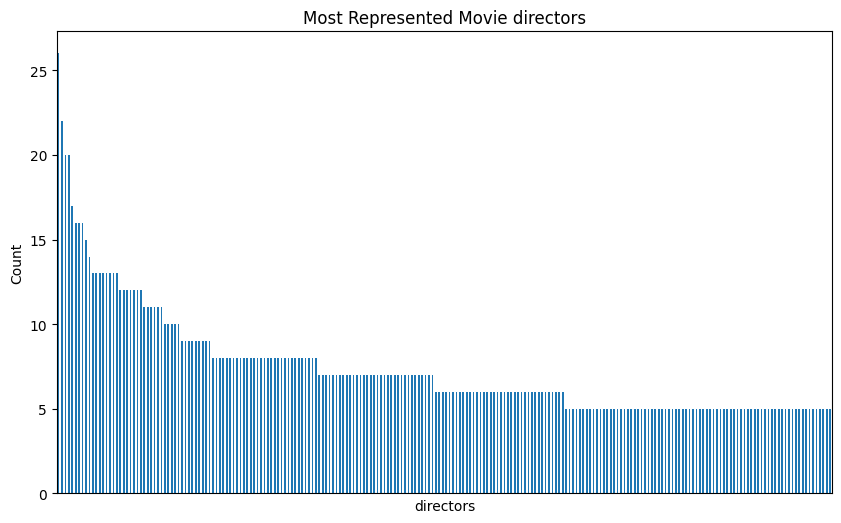

In [36]:
# Plot the directors counts
directors_counts.plot(kind='bar', figsize=(10, 6), use_index=False)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title("Most Represented Movie directors")
plt.xlabel("directors")
plt.ylabel("Count")
plt.show()

## Actors

In [30]:
movies_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
